 **KWANELE MLALAZI**

 **DATA SCIENCE INTERNSHIP TASK 2**

---



 **Exploratory Data Analysis on Terrorism**:



TASK: As a security/defense analyst, try to find out the hot zone of terrorism.



**1. IMPORT NECESSARY LIBRARIES**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [42]:
from google.colab import files
uploaded = files.upload()


**2. LOAD THE DATASET**

In [57]:

# Load the dataset
data = "globalterrorismdb_0718dist.csv"
df = pd.read_csv(data, encoding='ISO-8859-1')

# Display the first few rows
df.head()


<ipython-input-57-87fdc924bc99>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [58]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


3. **DATA CLEANING**





3. 1 Check for missing values

In [59]:
# Check for missing values
missing_values = df.isna().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


,0
gsubname3,181671
weapsubtype4,181621
weapsubtype4_txt,181621
weaptype4,181618
weaptype4_txt,181618
...,...
guncertain1,380
ishostkid,178
specificity,6
doubtterr,1


3. 2 Handle Missing Values

In [60]:
# Drop columns with more than 50% missing data
df_cleaned = df.dropna(thresh=len(df) * 0.5, axis=1)





In [61]:

# Fill missing categorical values with 'Unknown'
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('Unknown')

# Fill missing numerical values with the median
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())


<ipython-input-61-bae58532c62b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('Unknown')
<ipython-input-61-bae58532c62b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())


In [62]:
#Check if there are still missing values
df_cleaned.isna().any()


,0
eventid,False
iyear,False
imonth,False
iday,False
extended,False
country,False
country_txt,False
region,False
region_txt,False
provstate,False


**4. DESCRIPTIVE STATISTICS**

In [64]:
# Summary statistics for numeric columns
df_cleaned.describe()



,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,...,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.698173,-4.461064e+02,1.451437,...,0.320825,2.883296,0.025076,0.066382,-0.544556,0.058996,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.377236,2.021946e+05,0.995416,...,3.346474,34.309747,2.453378,1.172976,3.122889,0.461022,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.849620,6.655000e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.538561,6.835734e+01,1.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,500.000000,8191.000000,751.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
df_cleaned.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [66]:
# Count of attacks by country
country_counts = df_cleaned['country_txt'].value_counts().head(10)
print(country_counts)

# Count of attacks by region
region_counts = df_cleaned['region_txt'].value_counts().head(10)
print(region_counts)


country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64
region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: count, dtype: int64


**5. DATA VISUALIZATION**

**Bar Plot for Attacks by Country**

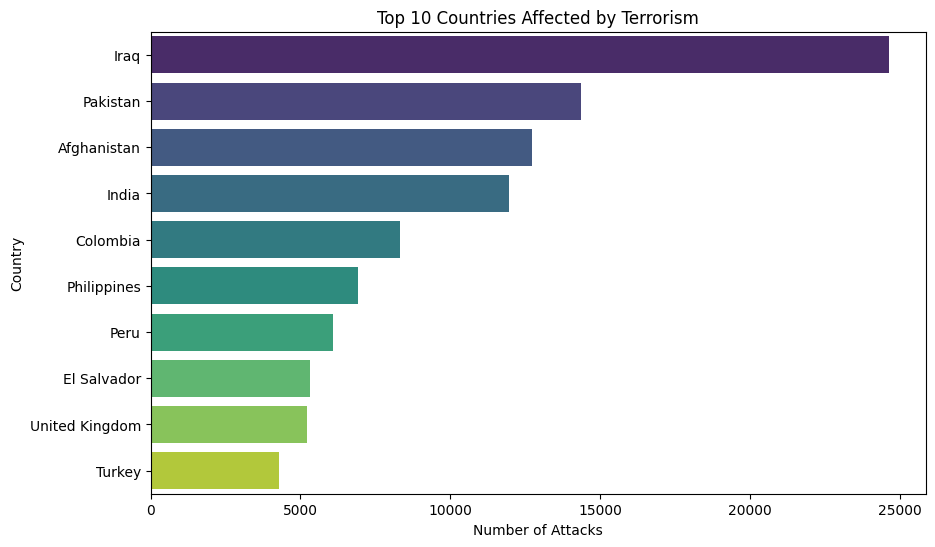

In [67]:

# Bar plot for the top 10 countries affected by terrorism
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Countries Affected by Terrorism')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()


**Bar Plot for Attacks by Region**

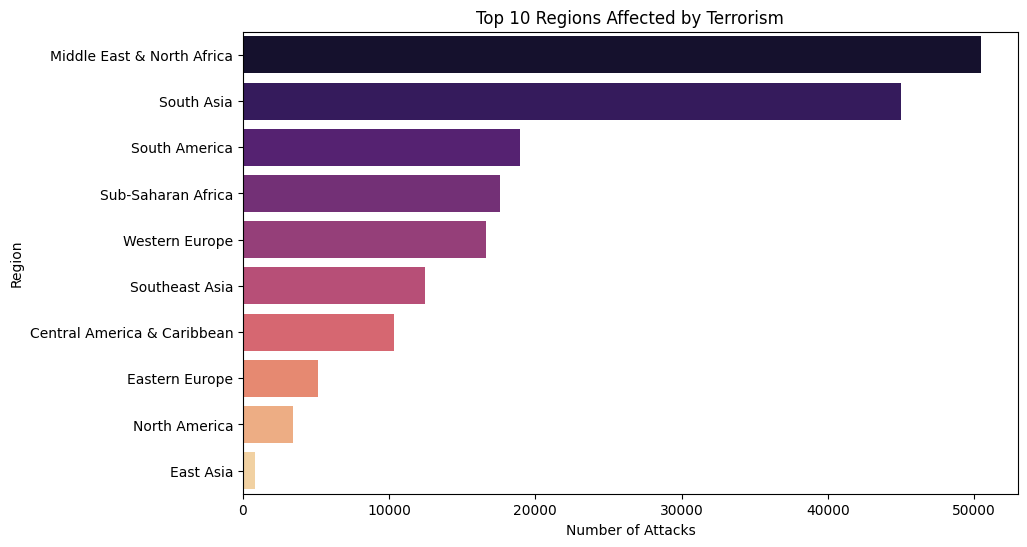

In [68]:
# Bar plot for the top 10 regions affected by terrorism
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='magma')
plt.title('Top 10 Regions Affected by Terrorism')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()


**Heatmap of Terrorism Incidents by Region and Year**

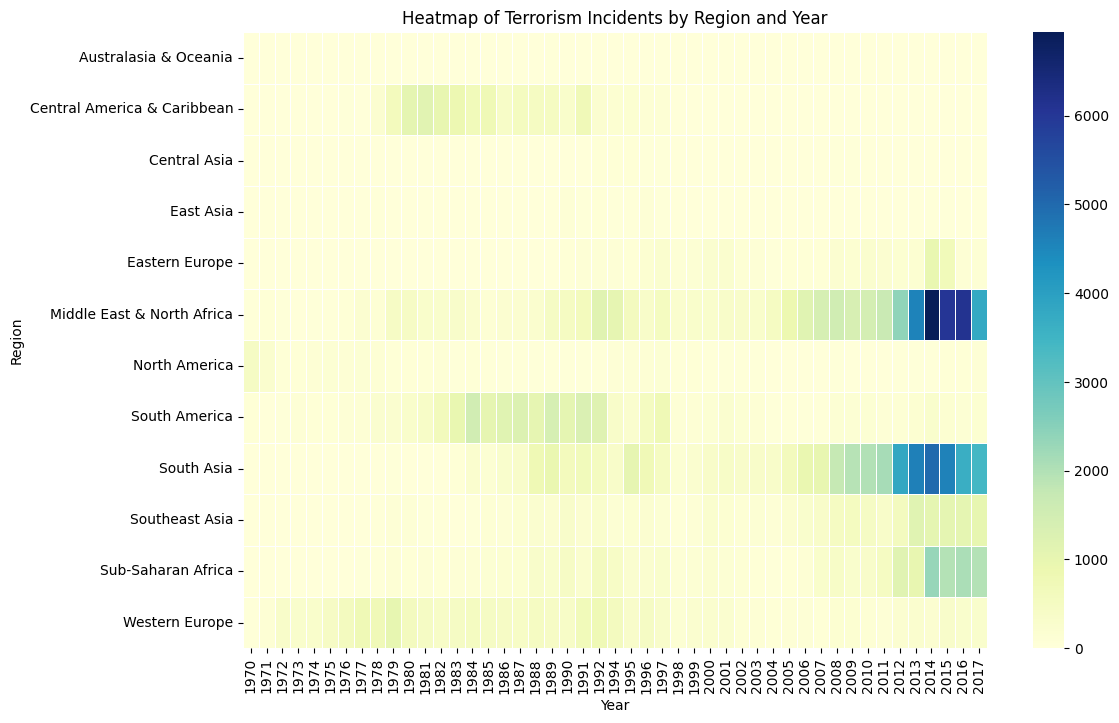

In [69]:
# Create a crosstab for region and year
region_year_crosstab = pd.crosstab(df_cleaned['region_txt'], df_cleaned['iyear'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_year_crosstab, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Terrorism Incidents by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()


**Monthly/Yearly Trends**

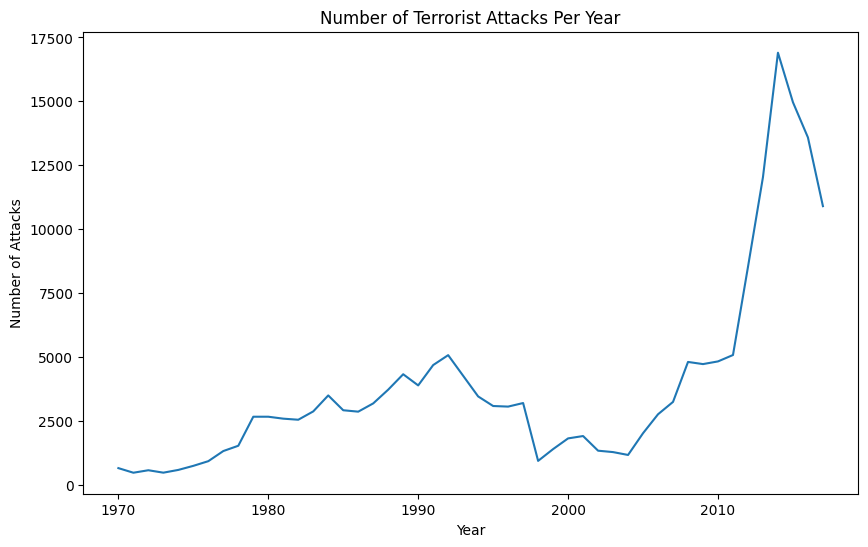

In [70]:
# Number of attacks per year
attacks_per_year = df_cleaned['iyear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title('Number of Terrorist Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()





**Attack Type Analysis**

---





**Most Common Attack Types**

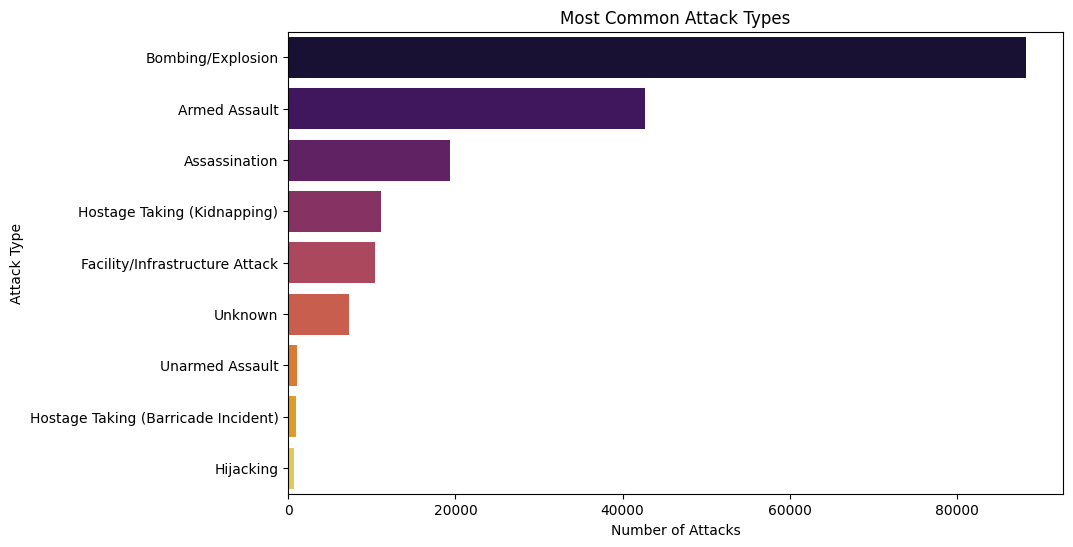

In [72]:
# Count of attacks by attack type
attack_type_counts = df_cleaned['attacktype1_txt'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_type_counts.values, y=attack_type_counts.index, palette='inferno')
plt.title('Most Common Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()


**Attack Success Rates**

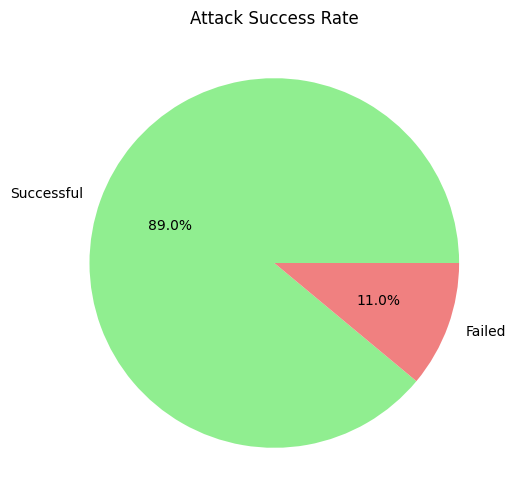

In [73]:
# Calculate the success rate of attacks
success_rate = df_cleaned['success'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
success_rate.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], labels=['Successful', 'Failed'])
plt.title('Attack Success Rate')
plt.ylabel('')
plt.show()


**Target Type Analysis**

---



**Top Targets**


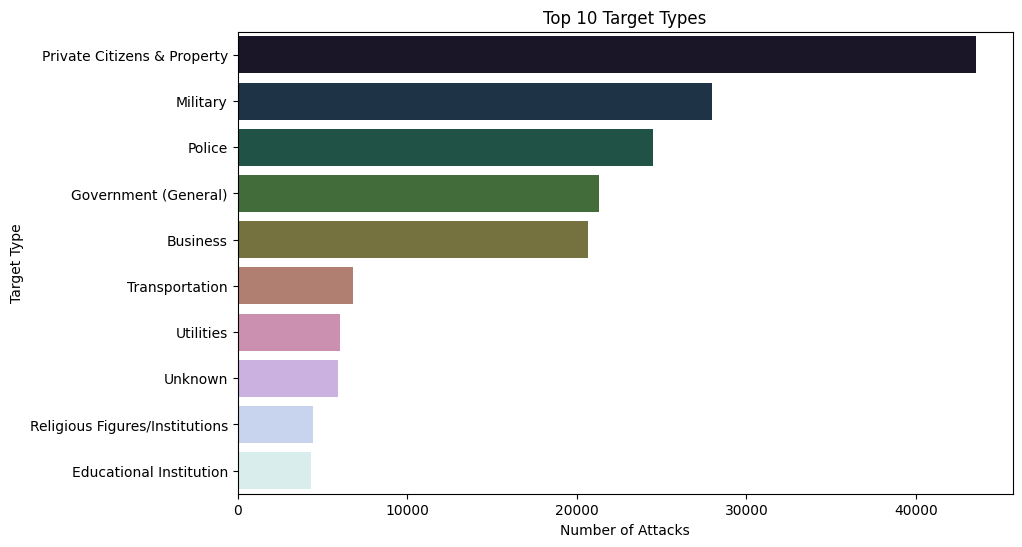

In [74]:
# Count of attacks by target type
target_type_counts = df_cleaned['targtype1_txt'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_type_counts.values, y=target_type_counts.index, palette='cubehelix')
plt.title('Top 10 Target Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.show()


**Target Impact**

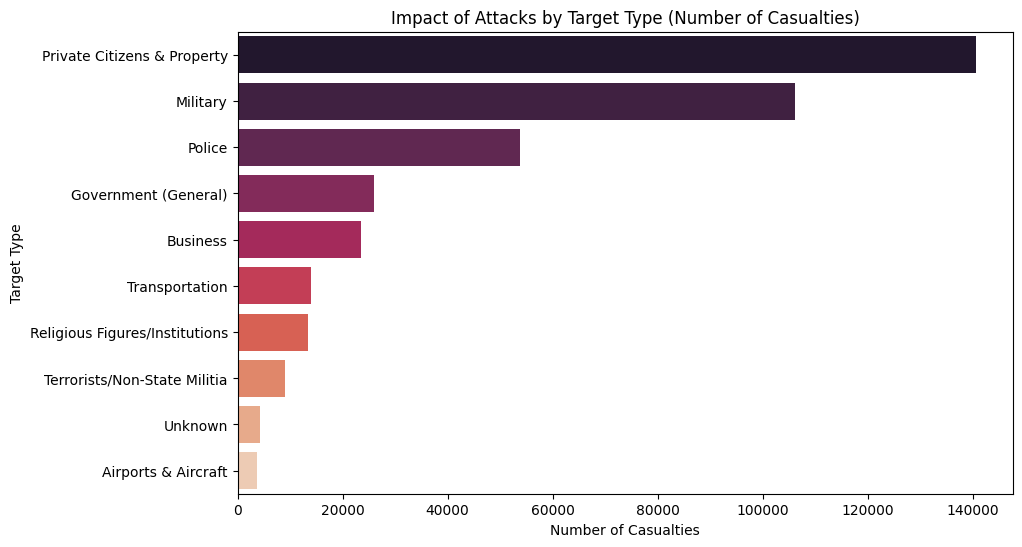

In [75]:
# Impact of attacks (e.g., number of casualties) by target type
target_impact = df_cleaned.groupby('targtype1_txt')['nkill'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_impact.values, y=target_impact.index, palette='rocket')
plt.title('Impact of Attacks by Target Type (Number of Casualties)')
plt.xlabel('Number of Casualties')
plt.ylabel('Target Type')
plt.show()
